In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('accidents.csv')

#### Statistical Description of each column

In [4]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


#### Data Cleaning

In [6]:
df1 = df.copy()

In [7]:
df1['Zipcode'].unique()

array(['43017', '45424', '45203', ..., '97028-9707', '94401-2213',
       '95993-9513'], dtype=object)

In [8]:
# Removing hyphen from Zipcode
df1['Zipcode'] = df1['Zipcode'].str.replace(r'-\d+', '')

C:\Users\Hp\AppData\Local\Temp\ipykernel_9860\1410754087.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Zipcode'] = df1['Zipcode'].str.replace(r'-\d+', '')


In [10]:
df1['Country'] = df1['Country'].str.lower()
df1['Street'] = df1['Street'].str.lower()
df1['City'] = df1['City'].str.lower()

#### Some thoughts on columns:-

- There are two columns 'County' and 'Country' as well so check if both are same or not.
- Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country' :- these are the fields which are similar, so check if there is any redundancy or not.

In [11]:
# creating the two columns, one to store list of features to drop and one to add features that are need to be added
drop_list=[]
feature_list=[]

In [12]:
df1[['Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country']]

,Number,Street,Side,City,County,State,Zipcode,Country
0,NaN,outerbelt e,R,dublin,Franklin,OH,43017,us
1,NaN,i-70 e,R,dayton,Montgomery,OH,45424,us
2,NaN,i-75 s,R,cincinnati,Hamilton,OH,45203,us
3,NaN,i-77 n,R,akron,Summit,OH,44311,us
4,NaN,i-75 s,R,cincinnati,Hamilton,OH,45217,us
...,...,...,...,...,...,...,...,...
2845337,NaN,pomona fwy e,R,riverside,Riverside,CA,92501,us
2845338,NaN,i-8 w,R,san diego,San Diego,CA,92108,us
2845339,NaN,garden grove fwy,R,orange,Orange,CA,92866,us
2845340,NaN,san diego fwy s,R,culver city,Los Angeles,CA,90230,us


In [15]:
#checking the Number column as we can see so much of nan values
df1['Number'].isnull().sum() / len(df1)

0.6129003121593116

#### we can see more than 50% percent values are missing and it is difficult to work with so many missing values. Hence we will drop the column.

In [16]:
drop_list.append('Number')

In [17]:
#Street == Shows the street name in address field.
df1['Street'].nunique()

159598

#### There are so many unique value for street, it will be good to drop this feature.

In [19]:
#Side¶ == Shows the relative side of the street (Right/Left) in address field.
df1['Side'].value_counts()

R    2353309
L     492032
N          1
Name: Side, dtype: int64

#### Side has one N value which we will remove it. 

In [21]:
df1.drop(df1.loc[df1['Side']=='N'].index,inplace=True)

In [22]:
df1['Side'].value_counts()

R    2353309
L     492032
Name: Side, dtype: int64

In [26]:
# County:- In the United States, a county is an administrative or political subdivision of a state that consists of a geographic region with specific boundaries
drop_list.append('County')

#### Columns like End_Lat and End_Lan have no values in their column
##### So the columns dropped are:
- End_Lat
- End_Lng
- Precipitation(in)
- Number

In [29]:
drop_list.extend(['End_Lat', 'End_Lng', 'Precipitation(in)', 'Number'])

#### Few of the columns are highly imabalanced, so we will remove the following columns:
- Bump
- Give_Way
- No_Exit
- Roundabout
- Traffic_Calming

<AxesSubplot:title={'center':'Traffic_Calming'}>

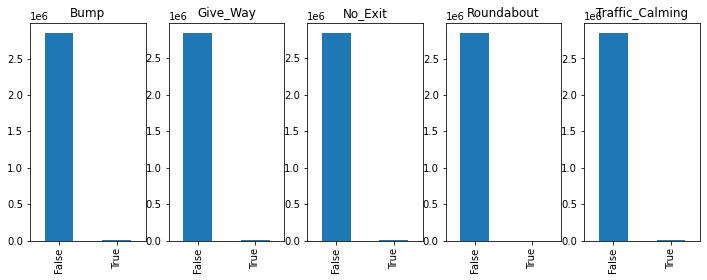

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,4))
df1['Bump'].value_counts().plot(kind='bar', title='Bump',ax=ax[0])
df1['Give_Way'].value_counts().plot(kind='bar', title='Give_Way',ax=ax[1])
df1['No_Exit'].value_counts().plot(kind='bar', title='No_Exit',ax=ax[2])
df1['Roundabout'].value_counts().plot(kind='bar', title='Roundabout',ax=ax[3])
df1['Traffic_Calming'].value_counts().plot(kind='bar', title='Traffic_Calming',ax=ax[4])

In [33]:
drop_list.extend(['Bump', 'Give_Way', 'No_Exit', 'Roundabout', 'Traffic_Calming'])

#### Columns like Astronomical_Twilight, City have null percentage less than 1, so we can just drop rows

In [38]:
drop_list.extend(['City', 'Astronomical_Twilight', 'Nautical_Twilight', 'Civil_Twilight', 'Street','Sunrise_Sunset', 'Zipcode', 'Timezone', 'Airport_Code'])

In [40]:
df1.shape

(2845341, 47)

In [41]:
df1 =df1.drop(drop_list,axis=1)

In [43]:
df1.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Side', 'State', 'Country',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Crossing', 'Junction', 'Railway',
       'Station', 'Stop', 'Traffic_Signal', 'Turning_Loop'],
      dtype='object')

In [44]:
file_name= 'cleaned.csv'
df1.to_csv(file_name, encoding='utf-8', index=False)